In [0]:
import pandas as pd
import numpy as np
import matplotlib as ml
import matplotlib.pyplot as plt
%matplotlib inline
ml.style.use('ggplot')

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
pc = pd.read_csv('/content/gdrive/My Drive/Planecrash.csv')
pc

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,aboard,fatalities,ground,summary
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",06:30,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",c 18:30,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20 (passengers:? crew:?),14 (passengers:? crew:?),0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5778,"July 10, 2018",0744,"Pretoria, South Africa",Rovos Air,?,Test Flight,Convair CV-340,ZS-BRV,215,19 (passengers:16 crew:3),1 (passengers:0 crew:1),1,"Shortly after takeoff from runway 29, the left..."
5779,"August 04, 2018",1655,"Flims, Switzerland",Ju Air,?,Locorno - Dubendorf,Junkers JU-52,HB-HOT,6595,20 (passengers:17 crew:3),20 (passengers:17 crew:3),1,The vintage aircraft crashed onto Piz Segnas m...
5780,"September 28, 2018",1010,"Chuuk, Micronesia",Air Niugini,?,Pohnpei - Chuuk,Boeing 737-8BK,P2-PXE,33024/1688,47 (passengers:35 crew:12),1 (passengers:1 crew:0),0,The aircraft was approaching for a landing at ...
5781,"October 29, 2018",0631,"Off Jakarta, Indonesia",Lion Air,610,Jakarta - Pangkal Pinang,Boeing 737-MAX 8,PK-LQP,43000/7058,189 (passengers:181 crew:8),189 (passengers:181 crew:8),0,"The airliner crashed into the Jakarta Sea, 13 ..."


**Replacing the ? with NaN**

In [5]:
pc.replace('?',np.nan,inplace=True)
pc

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,aboard,fatalities,ground,summary
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",c 18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20 (passengers:? crew:?),14 (passengers:? crew:?),0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5778,"July 10, 2018",0744,"Pretoria, South Africa",Rovos Air,NaN,Test Flight,Convair CV-340,ZS-BRV,215,19 (passengers:16 crew:3),1 (passengers:0 crew:1),1,"Shortly after takeoff from runway 29, the left..."
5779,"August 04, 2018",1655,"Flims, Switzerland",Ju Air,NaN,Locorno - Dubendorf,Junkers JU-52,HB-HOT,6595,20 (passengers:17 crew:3),20 (passengers:17 crew:3),1,The vintage aircraft crashed onto Piz Segnas m...
5780,"September 28, 2018",1010,"Chuuk, Micronesia",Air Niugini,NaN,Pohnpei - Chuuk,Boeing 737-8BK,P2-PXE,33024/1688,47 (passengers:35 crew:12),1 (passengers:1 crew:0),0,The aircraft was approaching for a landing at ...
5781,"October 29, 2018",0631,"Off Jakarta, Indonesia",Lion Air,610,Jakarta - Pangkal Pinang,Boeing 737-MAX 8,PK-LQP,43000/7058,189 (passengers:181 crew:8),189 (passengers:181 crew:8),0,"The airliner crashed into the Jakarta Sea, 13 ..."


**Separating out the Year of crash**

In [0]:
pc['year'] = pc['date'].str.slice(-4)
pc['year'] = pc['year'].astype(int)
pc

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,aboard,fatalities,ground,summary,year
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0,"During a demonstration flight, a U.S. Army fly...",1908
1,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0,Eugene Lefebvre was the first pilot to ever be...,1909
2,"July 12, 1912",06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0,First U.S. dirigible Akron exploded just offsh...,1912
3,"August 06, 1913",NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0,The first fatal airplane accident in Canada oc...,1913
4,"September 09, 1913",c 18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20 (passengers:? crew:?),14 (passengers:? crew:?),0,The airship flew into a thunderstorm and encou...,1913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5778,"July 10, 2018",0744,"Pretoria, South Africa",Rovos Air,NaN,Test Flight,Convair CV-340,ZS-BRV,215,19 (passengers:16 crew:3),1 (passengers:0 crew:1),1,"Shortly after takeoff from runway 29, the left...",2018
5779,"August 04, 2018",1655,"Flims, Switzerland",Ju Air,NaN,Locorno - Dubendorf,Junkers JU-52,HB-HOT,6595,20 (passengers:17 crew:3),20 (passengers:17 crew:3),1,The vintage aircraft crashed onto Piz Segnas m...,2018
5780,"September 28, 2018",1010,"Chuuk, Micronesia",Air Niugini,NaN,Pohnpei - Chuuk,Boeing 737-8BK,P2-PXE,33024/1688,47 (passengers:35 crew:12),1 (passengers:1 crew:0),0,The aircraft was approaching for a landing at ...,2018
5781,"October 29, 2018",0631,"Off Jakarta, Indonesia",Lion Air,610,Jakarta - Pangkal Pinang,Boeing 737-MAX 8,PK-LQP,43000/7058,189 (passengers:181 crew:8),189 (passengers:181 crew:8),0,"The airliner crashed into the Jakarta Sea, 13 ...",2018


**DECADE WITH MOST NUMBER OF CRASHES**

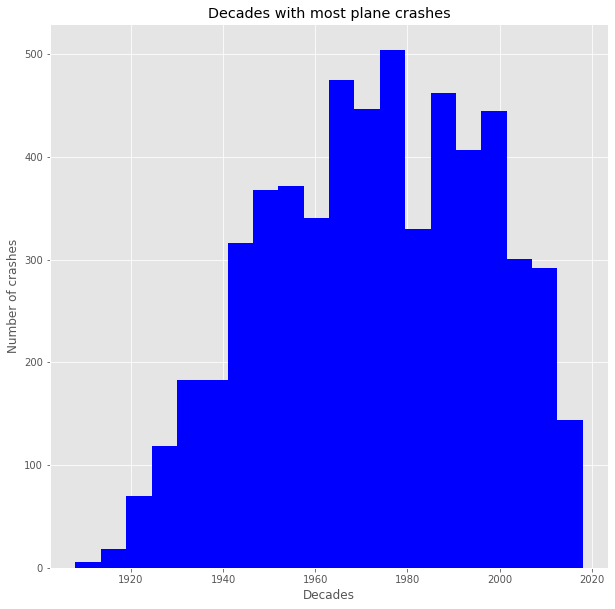

In [0]:
pc['year'].plot(kind='hist',bins=20,figsize=(10,10),color='blue')
plt.xlabel("Decades")
plt.ylabel("Number of crashes")
plt.title("Decades with most plane crashes")
plt.show()

It is clear that the most number of plane crash accidents were reported in between 1960 to 1980

**NUMBER OF CRASHES PER YEAR**

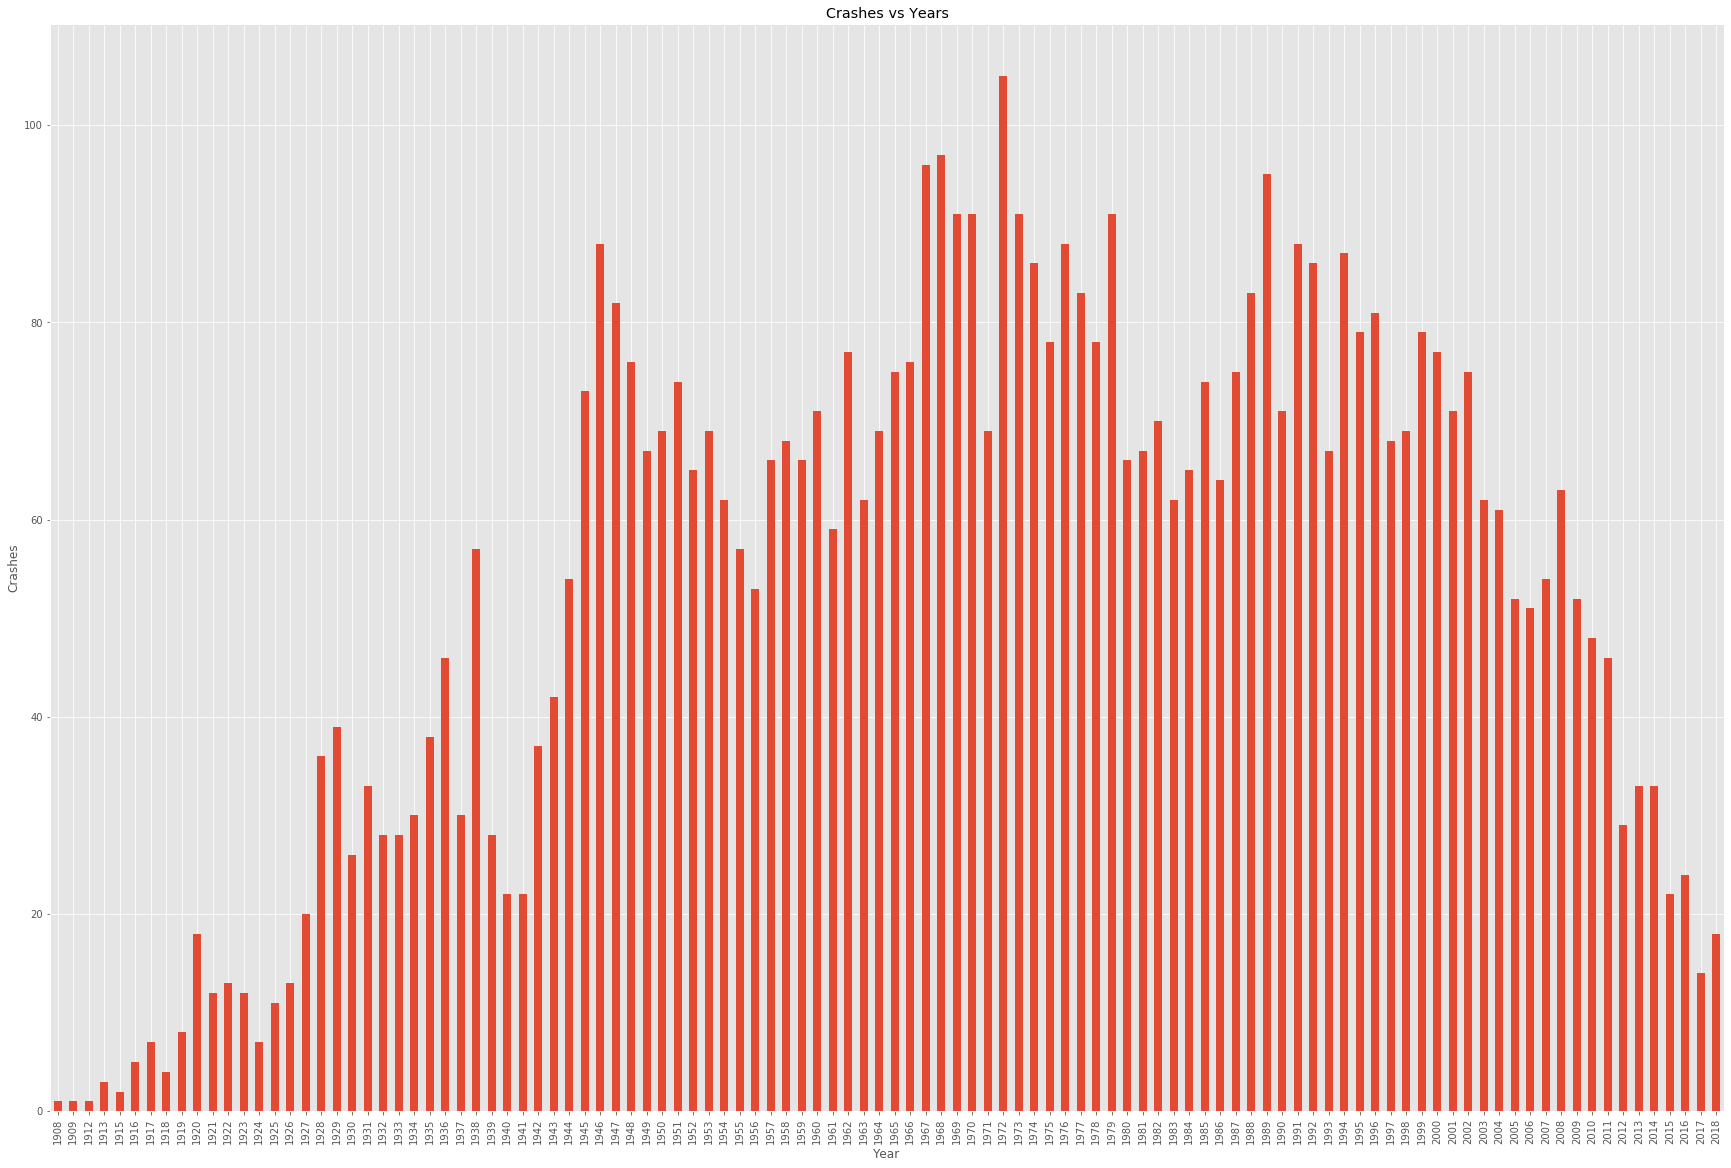

In [0]:
pc.groupby('year')['year'].agg('count').plot(kind='bar',figsize=(30,20))
plt.xlabel("Year")
plt.ylabel("Crashes")
plt.title("Crashes vs Years")
plt.show()

The most number of crashes were reported in the year 1972

**TOP 20 PLANE CATEGORIES PRONE TO CRASHING**

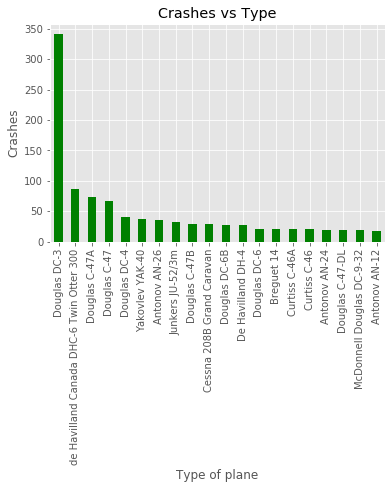

In [0]:
# Plane type with most number of crashes
pc.groupby('ac_type')['ac_type'].agg('count').sort_values(ascending=False).head(20).plot(kind='bar',color = 'Green')
plt.xlabel("Type of plane")
plt.ylabel("Crashes")
plt.title("Crashes vs Type")
plt.show()

The most crash-prone plane type is Douglas CD-3, followed by de Haviland Canada DHC-6 Twin Otter 300

**COMPARISON BETWEEN THE TYPES OF OPERATORS UNDER WHOM THE PLANES CRASHED**

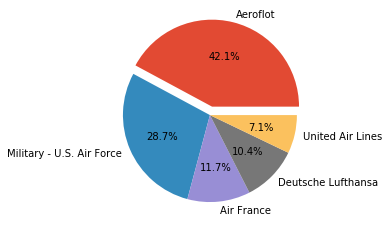

In [0]:
# Operator with most crashes
op_c = pc.groupby('operator')['operator'].agg('count').sort_values(ascending=False).head(5)
expld = (0.1,0,0,0,0)
plt.pie(op_c.values,explode=expld,labels=op_c.index,autopct='%1.1f%%')
plt.show()

Aeroflot contributes the most (42.1%)

**SURVIVAL : DECEASED RATIO ANALYSIS FOR PLANES THAT RESULTED IN MORE THAN 200 CRASHES**

1. Separating out the number of deceased and alive from all who were on the plane

In [7]:
# Number of people onboard on the planes that crashed
pc['onboard'] = pc['aboard'].str.partition(' ')[0]
pc['onboard'].replace('?','0',inplace=True)
pc['onboard'] = pc['onboard'].astype(int)

pc['deceased'] = pc['fatalities'].str.partition(' ')[0]
pc['deceased'].replace('?','0',inplace=True)
pc['deceased'] = pc['deceased'].astype(int)

pc['survived'] = pc['onboard'] - pc['deceased']

pc

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,aboard,fatalities,ground,summary,onboard,deceased,survived
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0,"During a demonstration flight, a U.S. Army fly...",2,1,1
1,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0,Eugene Lefebvre was the first pilot to ever be...,1,1,0
2,"July 12, 1912",06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0,First U.S. dirigible Akron exploded just offsh...,5,5,0
3,"August 06, 1913",NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0,The first fatal airplane accident in Canada oc...,1,1,0
4,"September 09, 1913",c 18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20 (passengers:? crew:?),14 (passengers:? crew:?),0,The airship flew into a thunderstorm and encou...,20,14,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5778,"July 10, 2018",0744,"Pretoria, South Africa",Rovos Air,NaN,Test Flight,Convair CV-340,ZS-BRV,215,19 (passengers:16 crew:3),1 (passengers:0 crew:1),1,"Shortly after takeoff from runway 29, the left...",19,1,18
5779,"August 04, 2018",1655,"Flims, Switzerland",Ju Air,NaN,Locorno - Dubendorf,Junkers JU-52,HB-HOT,6595,20 (passengers:17 crew:3),20 (passengers:17 crew:3),1,The vintage aircraft crashed onto Piz Segnas m...,20,20,0
5780,"September 28, 2018",1010,"Chuuk, Micronesia",Air Niugini,NaN,Pohnpei - Chuuk,Boeing 737-8BK,P2-PXE,33024/1688,47 (passengers:35 crew:12),1 (passengers:1 crew:0),0,The aircraft was approaching for a landing at ...,47,1,46
5781,"October 29, 2018",0631,"Off Jakarta, Indonesia",Lion Air,610,Jakarta - Pangkal Pinang,Boeing 737-MAX 8,PK-LQP,43000/7058,189 (passengers:181 crew:8),189 (passengers:181 crew:8),0,"The airliner crashed into the Jakarta Sea, 13 ...",189,189,0


2. Doing the analysis for the plane/case study with maximum passengers deceased

In [8]:
pc_p = pc['deceased'].sort_values(ascending=False)
ind = pc_p.index[0]
comp = pc.iloc[ind:ind+1,:]
comp

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,aboard,fatalities,ground,summary,onboard,deceased,survived
3164,"March 27, 1977",17:07,"Tenerife, Canary Islands",Pan American World Airways / KLM,1736/4805,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing B-747-121 / Boeing B-747-206B,N736PA/PH-BUF,19643/11 / 20400/157,644 (passengers:614 crew:30),583 (passengers:560 crew:23),0,Both aircraft were diverted to Tenerife becaus...,644,583,61


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


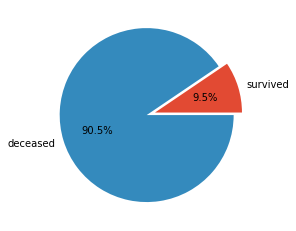

Reason of crash :  Both aircraft were diverted to Tenerife because of a bombing at Las Palmas Airport. After an extended delay,  both planes were instructed to back track up the runway. The KLM plane reached its takeoff point while the Pan Am plane was still on the runway. The Pan Am plane continued up the runway missing the taxiway turnout. There was heavy fog on the runway. The KLM plane began its takeoff roll without permission with the Pan Am plane still on the runway. The controller and Pan Am pilot each radioed a warning to the KLM plane, but were not heard because the simultaneous transmissions interfered with each other.The KLM plane hit the Pan Am plane just as it was taking off. Both planes burst into flames.  KLM 234 + 14 crew,  Pan Am 326 + 9 crew killed. All aboard the KLM plane were killed. The KLM captain was their safety officer and for some months had  been training other pilots using a simulator, where getting takeoff permission was not simulated. The Pan Am aircraft 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


In [9]:
plt.pie([pc.get_value(ind,'survived'),pc.get_value(ind,'deceased')],labels=['survived','deceased'],autopct='%1.1f%%',explode=(0.1,0))
plt.show()

print("Reason of crash : ", pc.get_value(ind,'summary'),"\n\n")

3. Then generalizing it for the top 29 cases

In [10]:
comp2 = pc[pc['deceased'] > 200]
comp2['flight_no'].replace(np.nan,'XX',inplace=True)
comp2

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,aboard,fatalities,ground,summary,onboard,deceased,survived
2917,"March 03, 1974",11:41,"Near Ermenonville, France",Turkish Airlines (THY),981,Paris - London,McDonnell Douglas DC-10-10,TC-JAV,46704/29,346 (passengers:335 crew:11),346 (passengers:335 crew:11),0,The aircraft crashed shortly after takeoff fro...,346,346,0
3164,"March 27, 1977",17:07,"Tenerife, Canary Islands",Pan American World Airways / KLM,1736/4805,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing B-747-121 / Boeing B-747-206B,N736PA/PH-BUF,19643/11 / 20400/157,644 (passengers:614 crew:30),583 (passengers:560 crew:23),0,Both aircraft were diverted to Tenerife becaus...,644,583,61
3233,"January 01, 1978",c 20:15,"Off Bandra, Maharashtra, India",Air India,855,Bombay - Dubai,Boeing B-747-237B,VT-EBD,19959/124,213 (passengers:190 crew:23),213 (passengers:190 crew:23),0,"Following a right turn, after taking off, the ...",213,213,0
3343,"May 25, 1979",15:04,"Chicago O'Hare, Illinois",American Airlines,191,"Chicago, IL- Los Angeles, CA",McDonnell Douglas DC-10-10,N110AA,46510/22,271 (passengers:258 crew:13),271 (passengers:258 crew:13),2,"During takeoff just, as the plane lifted from ...",271,271,0
3393,"November 28, 1979",12:49,"Near Mt. Erebus, Ross Ice Shelf, Antarctica",Air New Zealand,901,Auckland - Christchurch,McDonnell Douglas DC-10-30,ZK-NZP,46910/182,257 (passengers:237 crew:20),257 (passengers:237 crew:20),0,The aircraft crashed into the slopes of Mt. Er...,257,257,0
3445,"August 19, 1980",19:08,"Riyadh, Saudi Arabia",Saudi Arabian Airlines,163,Riyadh - Jeddah,Lockheed 1011-200 TriStar,HZ-AHK,1169,301 (passengers:287 crew:14),301 (passengers:287 crew:14),0,The flight experienced a fire in the aft cargo...,301,301,0
3646,"September 01, 1983",18:26,"Near Sakhalin Island, Russia",Korean Airlines,007,Anchorage - Seoul,Boeing B-747-230B,HL-7442,20559/186,269 (passengers:246 crew:23),269 (passengers:246 crew:23),0,"On a flight from Alaska to South Korea, the ai...",269,269,0
3769,"June 23, 1985",07:15,"Atlantic Ocean, 110 miles West of Ireland",Air India,182,Montreal - London,Boeing B-747-237B,VT-EFO,21473/330,329 (passengers:307 crew:22),329 (passengers:307 crew:22),0,The aircraft broke up in flight and crashed in...,329,329,0
3775,"August 12, 1985",18:56,"Mt. Osutaka, near Ueno Village, Japan",Japan Air Lines,123,Tokyo - Osaka,Boeing B-747-SR46,JA8119,20783/230,524 (passengers:509 crew:15),520 (passengers:505 crew:15),0,The aircraft suffered an aft pressure bulkhead...,524,520,4
3803,"December 12, 1985",06:45,"Gander, Newfoundland, Canada",Arrow Airways,MF1285R,"Gander - Fort Campbell, KY",McDonnell Douglas DC-8 Super 63PF,N950JW,46058/433,256 (passengers:248 crew:8),256 (passengers:248 crew:8),0,The aircraft stalled and crashed during takeof...,256,256,0


Text(0.5, 1.0, 'Comparing the survived : deceased ratio in crashes with deceased > 200')

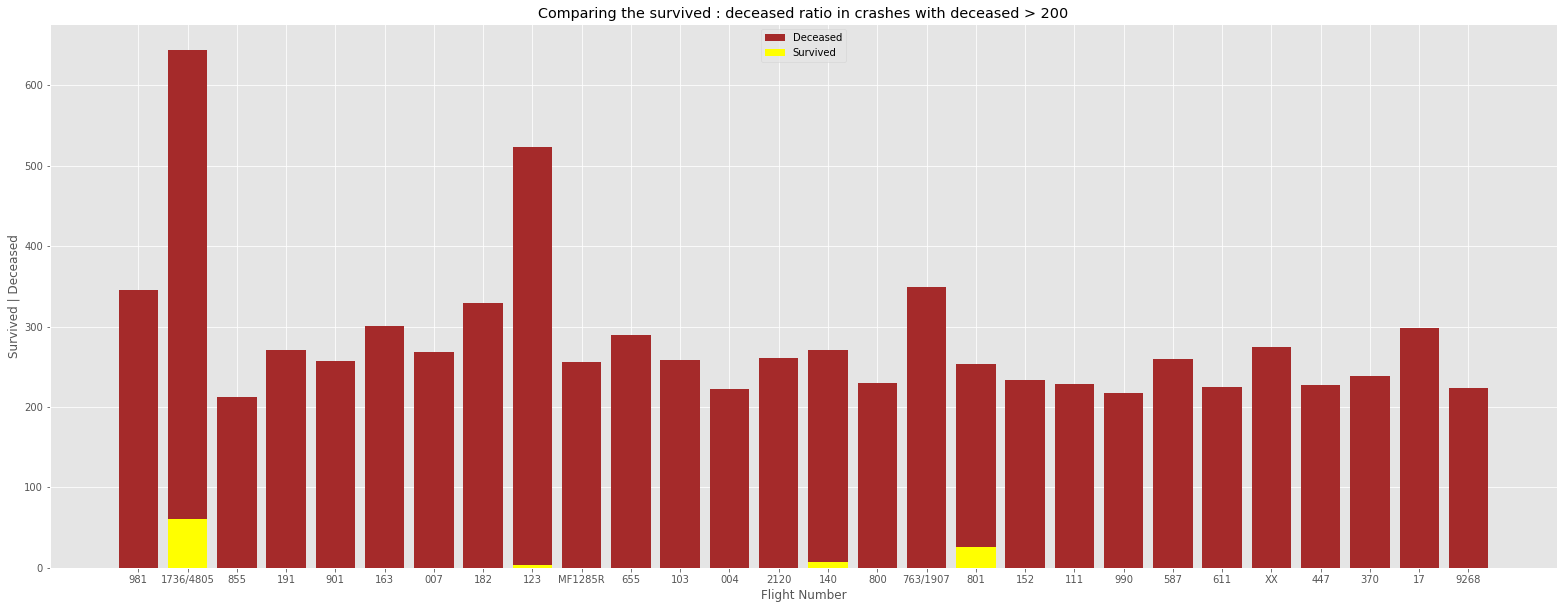

In [15]:
plt.figure(figsize=(27,10))
plt.bar(comp2.flight_no,comp2.onboard,color='Brown')
plt.bar(comp2.flight_no,comp2.survived,color='Yellow')

plt.xlabel("Flight Number")
plt.ylabel("Survived | Deceased")
plt.legend(('Deceased','Survived'),loc='upper center')
plt.title("Comparing the survived : deceased ratio in crashes with deceased > 200")

**We see, plane number 1736/4805 not only had the most number of passengers, but also resulted in the most number of deaths.**